# Project - Word Cloud

For this project, we'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.

## STEP -1 

Import all the required modules required for the script.And define specific function for different tasks.


In [1]:
# Here are all the imports you will need for your word cloud script and uploader widget
import wordcloud
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

To upload the text file, the following cell contains the code for a custom uploader widget. Once we run this cell, a ***Browse*** button should appear below it. Click this button and navigate the window to locate saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
    


The following function will calculate the frequency of each word(whose length is greater than 5) in the file and store that in a dictionary.

In [3]:
def (file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    dic={}
    a=file_contents.split()

    for word in a:
        if word.isalpha() and len(word)>5 or word.lower() == 'harry':
            if word.lower() not in dic.keys():
                dic[word.lower()] = 1
            else:
                dic[word.lower()] += 1
    return dic           



The following functions will generate the word clouds. One with a mask and other without a mask.

In [4]:
def generate_word_cloud_with_mask(dic):
    alice_mask = np.array(Image.open("images.jpeg"))
    cloud = wordcloud.WordCloud(background_color = 'black', max_words = 100, max_font_size=13, mask=alice_mask,
                                random_state =580, colormap = 'YlOrRd_r')
    cloud.generate_from_frequencies(dic)
    return cloud.to_array()

In [5]:
def generate_simple_word_cloud(dic):
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dic)
    return cloud.to_array()

## STEP - 2
Call the function ***_upload*** to uplaod the text file, ***calculate_frequencies*** for calculating frequency of words and ***generate_word_cloud_with_mask*** & ***generate_simple_word_cloud*** for generating the word cloud

In [6]:
_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `india.txt` (160.48 kB)


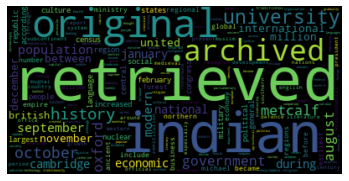

In [7]:
# Display simple wordcloud image

myimage = generate_simple_word_cloud(calculate_frequencies(file_contents))
plt.imshow(myimage, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `harry.txt` (71.13 kB)


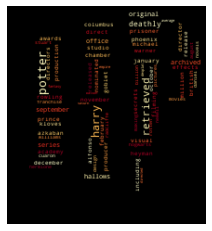

In [9]:
# Display your wordcloud with mask image

myimage = generate_word_cloud_with_mask(calculate_frequencies(file_contents))
plt.imshow(myimage, interpolation="bilinear")
plt.axis('off')
plt.show()